In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('youtube_comments_full_anonymized.csv')

# Display the first few rows of the dataframe
df.head()

,Comment,Anonymized Author,Published At,Likes,Reply Count
0,Ya this is an good invention that we drive ev ...,667e8d19fa9123ecadb71631917bbbc2,2023-12-06T09:54:19Z,0,0
1,Let car be charged while you may drink a cup o...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:17:25Z,0,0
2,Is.that the car stops charhing better than up ...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:08:28Z,0,0
3,😂how much of invetsment of.this instead of a n...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:04:52Z,0,0
4,what will happen if an accident happens and a ...,e673dba59001bbeacd4ae6d6fa09f3f2,2023-12-04T15:47:42Z,0,0


In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicate_rows = df.duplicated().sum()

In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Comment              0
Anonymized Author    0
Published At         0
Likes                0
Reply Count          0
dtype: int64


In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [7]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
df.info()

# Display the first few rows of the dataframe
print("\nFirst Few Rows of the Dataset:")
df.head()

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Comment            424 non-null    object
 1   Anonymized Author  424 non-null    object
 2   Published At       424 non-null    object
 3   Likes              424 non-null    int64 
 4   Reply Count        424 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 16.7+ KB

First Few Rows of the Dataset:


,Comment,Anonymized Author,Published At,Likes,Reply Count
0,Ya this is an good invention that we drive ev ...,667e8d19fa9123ecadb71631917bbbc2,2023-12-06T09:54:19Z,0,0
1,Let car be charged while you may drink a cup o...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:17:25Z,0,0
2,Is.that the car stops charhing better than up ...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:08:28Z,0,0
3,😂how much of invetsment of.this instead of a n...,7ddfba69037c0d749088d184f0fab66a,2023-12-05T03:04:52Z,0,0
4,what will happen if an accident happens and a ...,e673dba59001bbeacd4ae6d6fa09f3f2,2023-12-04T15:47:42Z,0,0


In [8]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
df.describe()

Summary Statistics for Numerical Columns:


,Likes,Reply Count
count,424.000000,424.000000
mean,1.783019,0.400943
std,9.522406,1.727157
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,165.000000,22.000000


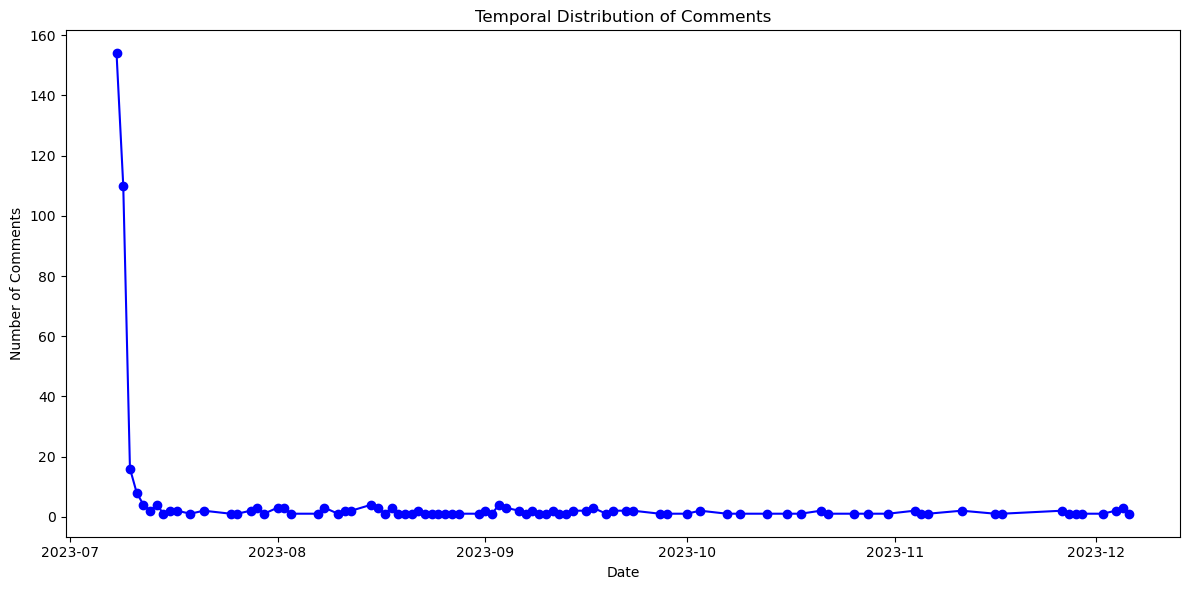

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Published At' to datetime
df['Published At'] = pd.to_datetime(df['Published At'])

# Create a timeline plot for comments
plt.figure(figsize=(12, 6))
df['Published At'].dt.date.value_counts().sort_index().plot(kind='line', color='blue', marker='o')
plt.title('Temporal Distribution of Comments')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.show()

In [10]:
# Create a summary table of the number of comments per date
comment_distribution = df['Published At'].dt.date.value_counts().sort_index()
print("Number of Comments per Date:")
print(comment_distribution)

Number of Comments per Date:
2023-07-08    154
2023-07-09    110
2023-07-10     16
2023-07-11      8
2023-07-12      4
             ... 
2023-11-29      1
2023-12-02      1
2023-12-04      2
2023-12-05      3
2023-12-06      1
Name: Published At, Length: 87, dtype: int64


In [13]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to each comment
df['Sentiment'] = df['Comment'].apply(calculate_sentiment)

# Display the first few rows with sentiment scores
df[['Comment', 'Sentiment']].head()

,Comment,Sentiment
0,Ya this is an good invention that we drive ev ...,0.050
1,Let car be charged while you may drink a cup o...,0.100
2,Is.that the car stops charhing better than up ...,0.500
3,😂how much of invetsment of.this instead of a n...,0.175
4,what will happen if an accident happens and a ...,0.000


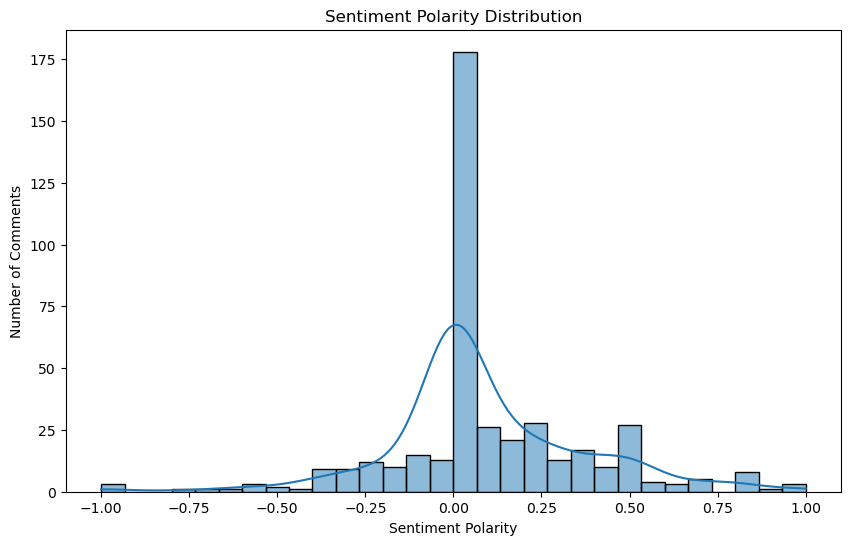

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Comments')
plt.show()

In [16]:
#Summary Table
# Define sentiment categories
def sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiments
df['Sentiment Category'] = df['Sentiment'].apply(sentiment_category)

# Create a summary table for sentiment distribution
sentiment_summary = df['Sentiment Category'].value_counts()
print("Sentiment Distribution Summary:")
print(sentiment_summary)

Sentiment Distribution Summary:
Positive    185
Neutral     159
Negative     80
Name: Sentiment Category, dtype: int64


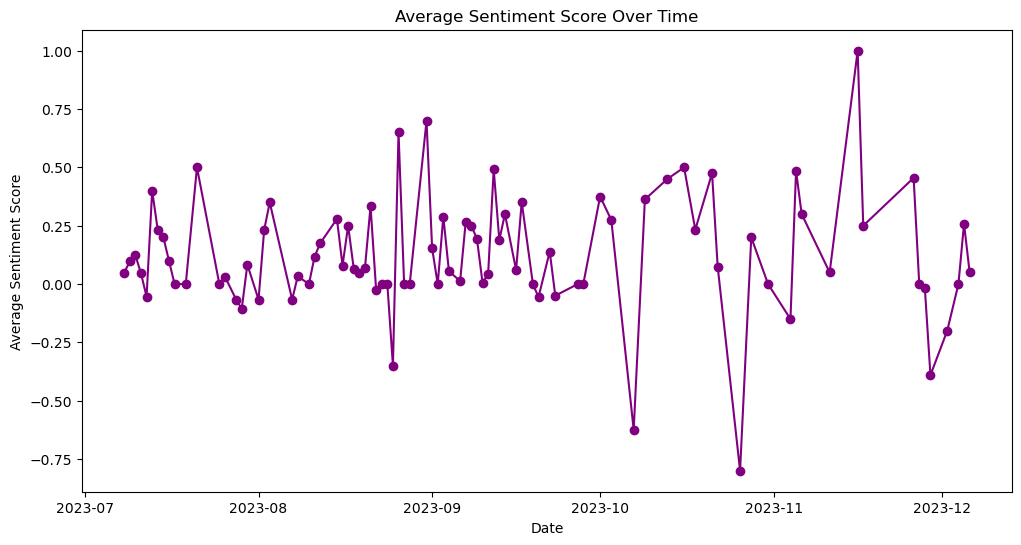

In [25]:
# Group by date and calculate average sentiment
average_sentiment_per_day = df.groupby(df['Published At'].dt.date)['Sentiment'].mean()

# Create a plot for average sentiment over time
plt.figure(figsize=(12, 6))
average_sentiment_per_day.plot(kind='line', color='purple', marker='o')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

In [18]:
#Summary Table
# Convert the series to a DataFrame for better display
average_sentiment_per_day_df = average_sentiment_per_day.reset_index()
average_sentiment_per_day_df.columns = ['Date', 'Average Sentiment Score']

# Print the summary table
print("Average Sentiment Score Per Day:")
print(average_sentiment_per_day_df)

Average Sentiment Score Per Day:
          Date  Average Sentiment Score
0   2023-07-08                 0.048752
1   2023-07-09                 0.096703
2   2023-07-10                 0.123606
3   2023-07-11                 0.045781
4   2023-07-12                -0.053838
..         ...                      ...
82  2023-11-29                -0.390625
83  2023-12-02                -0.200000
84  2023-12-04                 0.000000
85  2023-12-05                 0.258333
86  2023-12-06                 0.050000

[87 rows x 2 columns]


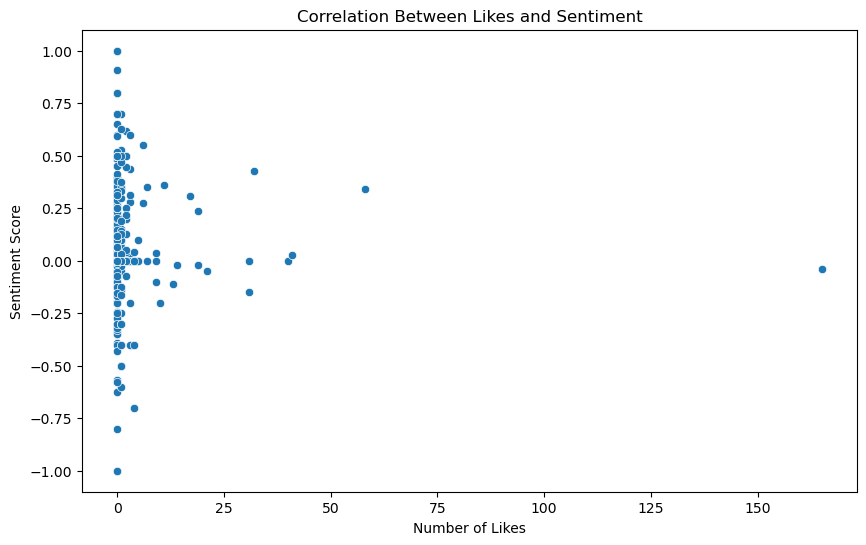

Correlation coefficient between Likes and Sentiment: -0.018236731355155234


In [19]:
import seaborn as sns

# Scatter plot for likes vs sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Sentiment', data=df)
plt.title('Correlation Between Likes and Sentiment')
plt.xlabel('Number of Likes')
plt.ylabel('Sentiment Score')
plt.show()

# Calculating the correlation coefficient
correlation = df['Likes'].corr(df['Sentiment'])
print("Correlation coefficient between Likes and Sentiment:", correlation)

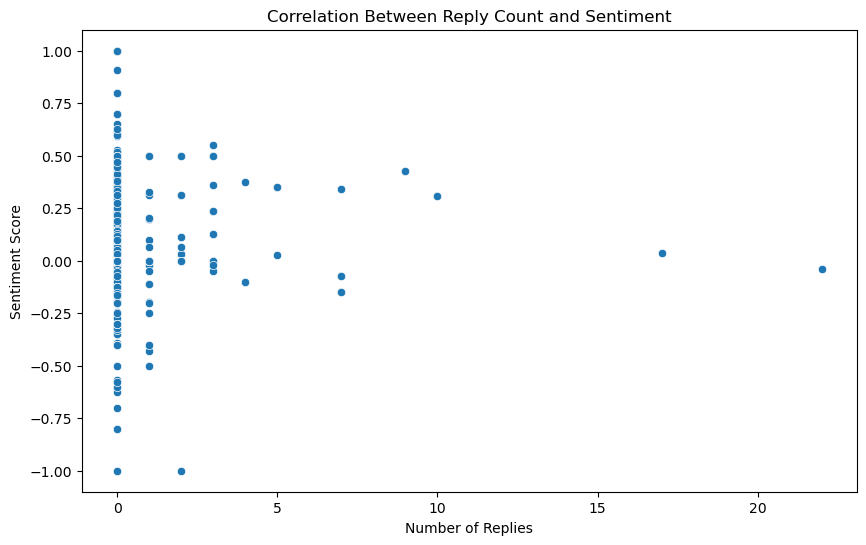

Correlation coefficient between Reply Count and Sentiment: 6.483448430004471e-05


In [20]:
# Scatter plot for reply count vs sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reply Count', y='Sentiment', data=df)
plt.title('Correlation Between Reply Count and Sentiment')
plt.xlabel('Number of Replies')
plt.ylabel('Sentiment Score')
plt.show()

# Calculating the correlation coefficient
correlation_reply_sentiment = df['Reply Count'].corr(df['Sentiment'])
print("Correlation coefficient between Reply Count and Sentiment:", correlation_reply_sentiment)

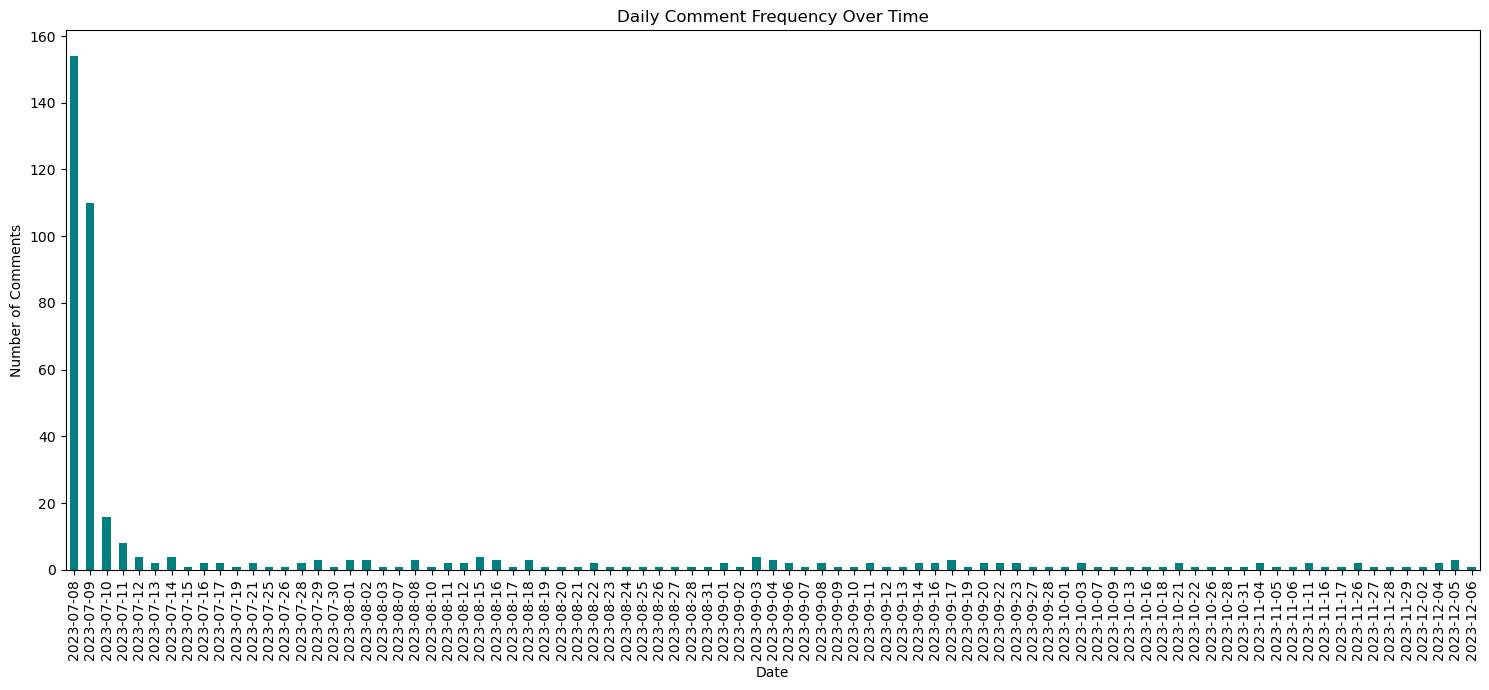

In [21]:
# Create a bar chart for the number of comments per day
plt.figure(figsize=(15, 7))
df['Published At'].dt.date.value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Daily Comment Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()